<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/PyTorch/Neural_Network_Classification_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network Classification with PyTorch

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np

### Make classification data

In [2]:
from sklearn.datasets import make_circles

In [3]:
n_samples = 1000
X,y = make_circles(n_samples,
                   noise=0.05,random_state=42)

In [4]:
X[:5]

array([[ 0.74220688,  0.24668576],
       [-0.7340323 ,  0.16869164],
       [-0.82985872,  0.22195899],
       [-0.42913559,  0.67223019],
       [ 0.44560223, -0.89493556]])

In [5]:
y[:5]

array([1, 1, 1, 1, 0])

In [6]:
circles = pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'label':y})

In [7]:
import matplotlib.pyplot as plt

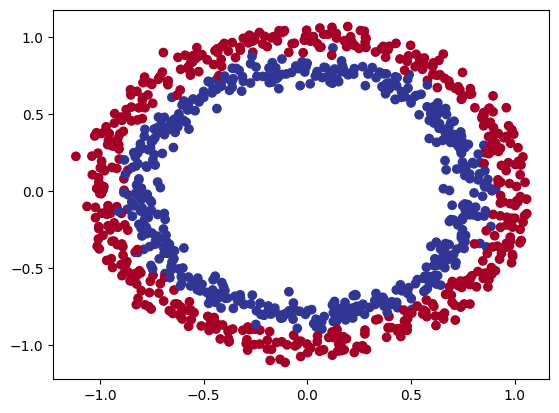

In [8]:
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [9]:
X.shape,y.shape

((1000, 2), (1000,))

In [10]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [12]:
X_train.dtype,y_train.dtype

(torch.float32, torch.float32)

In [13]:
X_train.shape

torch.Size([800, 2])

### Building a Model

In [14]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer_1 = nn.Linear(in_features = 2,out_features = 5)
    self.linear_layer_2 = nn.Linear(in_features = 5,out_features = 1)

  def forward(self,x):
    return self.linear_layer_2(self.linear_layer_1(x))

In [15]:
model_0 = CircleModelV0()

In [16]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
)

In [17]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6278,  0.4713],
                      [ 0.5170,  0.0820],
                      [-0.6721,  0.3469],
                      [-0.5827, -0.3496],
                      [ 0.1558, -0.1749]])),
             ('0.bias', tensor([-0.2977, -0.0139,  0.4162,  0.3995,  0.2657])),
             ('1.weight',
              tensor([[ 0.4309,  0.3552,  0.1722, -0.1489, -0.2669]])),
             ('1.bias', tensor([-0.0687]))])

In [19]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_0.parameters(),lr=0.01)

In [20]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

### Training and Testing Loop

In [21]:
torch.manual_seed(42)
epochs = 100
for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  #Calculate Loss/Accuracy
  loss = loss_fn(y_logits,y_train)
  accuracy = accuracy_fn(y_train,y_preds)

  # Optimizer zero grad
  optimizer.zero_grad()

  #Loss Backward
  loss.backward()
  # Optmizer Step
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(test_pred,y_test)

  if epoch%10 == 0:
    print(f"Epoch: {epoch}|Loss:{loss: .5f}|Acc: {accuracy:.2f}|Test Loss:{test_loss:.5f}| Test acc: {test_acc:.2f}")

Epoch: 0|Loss: 0.71778|Acc: 46.88|Test Loss:0.70870| Test acc: 49.00
Epoch: 10|Loss: 0.69659|Acc: 49.88|Test Loss:0.69415| Test acc: 54.50
Epoch: 20|Loss: 0.69486|Acc: 54.75|Test Loss:0.69334| Test acc: 57.50
Epoch: 30|Loss: 0.69339|Acc: 49.25|Test Loss:0.69267| Test acc: 48.00
Epoch: 40|Loss: 0.69324|Acc: 49.88|Test Loss:0.69330| Test acc: 50.50
Epoch: 50|Loss: 0.69310|Acc: 51.38|Test Loss:0.69371| Test acc: 51.00
Epoch: 60|Loss: 0.69311|Acc: 52.50|Test Loss:0.69383| Test acc: 49.50
Epoch: 70|Loss: 0.69310|Acc: 50.12|Test Loss:0.69377| Test acc: 47.50
Epoch: 80|Loss: 0.69309|Acc: 50.50|Test Loss:0.69373| Test acc: 48.50
Epoch: 90|Loss: 0.69309|Acc: 50.25|Test Loss:0.69371| Test acc: 50.00


### Importing helper functions

In [22]:
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py

--2023-08-20 09:41:12--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10160 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.92K  --.-KB/s    in 0s      

2023-08-20 09:41:13 (117 MB/s) - ‘helper_functions.py’ saved [10160/10160]



### Plot Decision Boundary

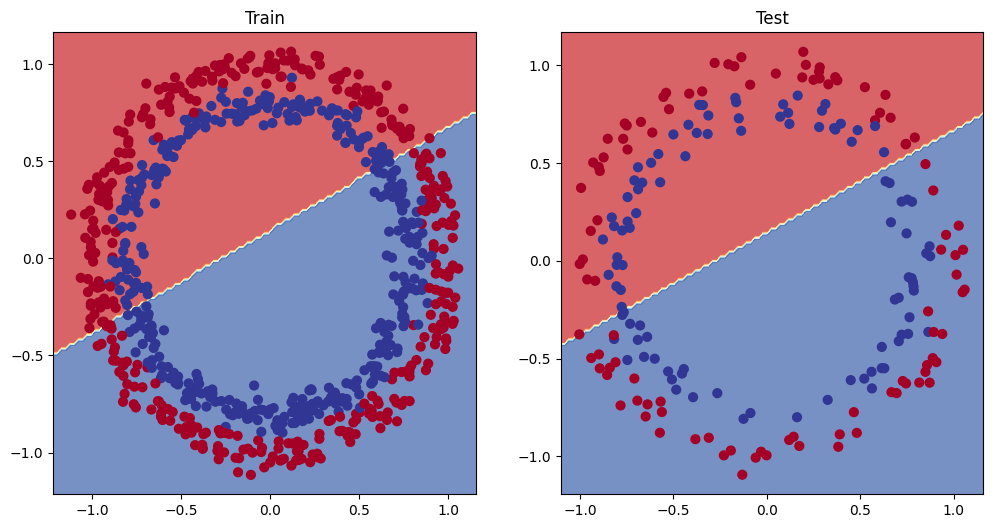

In [23]:
from helper_functions import plot_predictions,plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_0,X_test,y_test)

### Improving Model

In [24]:
model_1 = nn.Sequential(
    nn.Linear(in_features=2,out_features = 128),
    nn.Linear(in_features = 128,out_features = 256),
    nn.ReLU(),
    nn.Linear(in_features = 256,out_features = 512),
    nn.ReLU(),
    nn.Linear(in_features = 512,out_features = 1),
)

In [25]:
model_1

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=1, bias=True)
)

In [26]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_1.parameters(),lr = 0.1)

In [27]:
X_train.dtype,y_train.dtype

(torch.float32, torch.float32)

In [28]:
model_1

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=1, bias=True)
)

In [29]:
torch.manual_seed(42)
epochs = 1000
for epoch  in range(1,epochs+1):
  model_1.train()
  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,y_train)
  accuracy = accuracy_fn(y_train,y_preds)

  optimizer.zero_grad()

  #Loss Backward
  loss.backward()
  # Optmizer Step
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(test_pred,y_test)

  if epoch%10 == 0:
    print(f"Epoch: {epoch}|Loss:{loss: .5f}|Acc: {accuracy:.2f}|Test Loss:{test_loss:.5f}| Test acc: {test_acc:.2f}")

Epoch: 10|Loss: 30.93078|Acc: 49.00|Test Loss:3.36008| Test acc: 51.50
Epoch: 20|Loss: 0.71330|Acc: 61.38|Test Loss:0.72810| Test acc: 59.50
Epoch: 30|Loss: 0.89282|Acc: 64.25|Test Loss:0.70373| Test acc: 64.50
Epoch: 40|Loss: 0.52953|Acc: 70.25|Test Loss:0.56066| Test acc: 70.00
Epoch: 50|Loss: 0.49987|Acc: 71.50|Test Loss:0.49276| Test acc: 72.00
Epoch: 60|Loss: 0.43641|Acc: 75.25|Test Loss:0.46528| Test acc: 73.00
Epoch: 70|Loss: 0.40595|Acc: 76.75|Test Loss:0.46650| Test acc: 74.50
Epoch: 80|Loss: 0.72786|Acc: 69.25|Test Loss:0.47223| Test acc: 77.00
Epoch: 90|Loss: 0.42452|Acc: 76.62|Test Loss:0.47654| Test acc: 74.00
Epoch: 100|Loss: 0.39084|Acc: 78.50|Test Loss:0.42903| Test acc: 75.00
Epoch: 110|Loss: 0.34810|Acc: 80.75|Test Loss:0.38872| Test acc: 77.50
Epoch: 120|Loss: 0.31356|Acc: 82.12|Test Loss:0.37301| Test acc: 80.00
Epoch: 130|Loss: 1.91058|Acc: 66.62|Test Loss:1.46843| Test acc: 71.50
Epoch: 140|Loss: 0.62612|Acc: 61.62|Test Loss:0.63836| Test acc: 59.50
Epoch: 150|Los

In [30]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.001
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight*X_regression+bias

In [31]:
print(len(X_regression))

1000


In [32]:
X_reg_train,X_reg_test,y_reg_train,y_reg_test = train_test_split(X_regression,y_regression,test_size = 0.2)

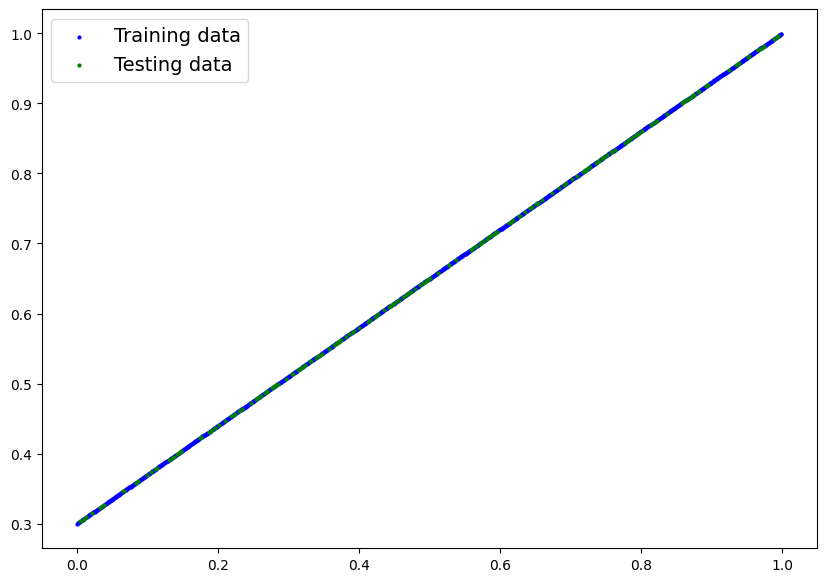

In [33]:
plot_predictions(X_reg_train,y_reg_train,X_reg_test,y_reg_test)

In [34]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1,out_features = 128),
    nn.Linear(in_features = 128,out_features = 256),
    nn.ReLU(),
    nn.Linear(in_features = 256,out_features = 512),
    nn.ReLU(),
    nn.Linear(in_features = 512,out_features = 1),
)

In [35]:
model_2

Sequential(
  (0): Linear(in_features=1, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=1, bias=True)
)

In [36]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(),lr=0.1)

In [37]:
torch.manual_seed(42)
epochs = 1000
for epoch in range(1,epochs+1):
  model_2.train()
  y_pred = model_2(X_reg_train)
  train_loss = loss_fn(y_pred,y_reg_train)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()
  model_2.eval()
  with torch.inference_mode():
    y_test_pred = model_2(X_reg_test)
    test_loss = loss_fn(y_test_pred,y_reg_test)
  if epoch%100==0:
    print(f"Epoch: {epoch}|Train Loss: {train_loss} | Test Loss: {test_loss}")

Epoch: 100|Train Loss: 0.09811078011989594 | Test Loss: 0.04696580395102501
Epoch: 200|Train Loss: 0.09458599239587784 | Test Loss: 0.06395541876554489
Epoch: 300|Train Loss: 0.03904739394783974 | Test Loss: 0.1100766658782959
Epoch: 400|Train Loss: 0.07286116480827332 | Test Loss: 0.0834721028804779
Epoch: 500|Train Loss: 0.10011287033557892 | Test Loss: 0.06767162680625916
Epoch: 600|Train Loss: 0.11481744796037674 | Test Loss: 0.06118326634168625
Epoch: 700|Train Loss: 0.019487900659441948 | Test Loss: 0.03278942033648491
Epoch: 800|Train Loss: 0.023225057870149612 | Test Loss: 0.026148181408643723
Epoch: 900|Train Loss: 0.08694206923246384 | Test Loss: 0.06109233200550079
Epoch: 1000|Train Loss: 0.08639629185199738 | Test Loss: 0.053239159286022186


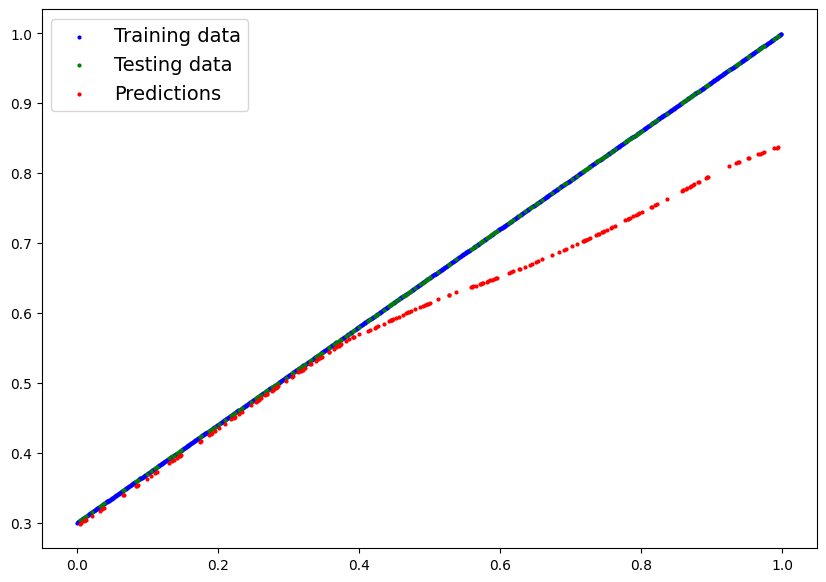

In [38]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_reg_test)
plot_predictions(X_reg_train,y_reg_train,X_reg_test,y_reg_test,y_preds)

## Multi-Class Classification

### Creating a toy multi-class dataset

In [39]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [40]:
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42

In [95]:
X_blob,y_blob = make_blobs(n_samples=1000,n_features=NUM_FEATURES,cluster_std=1.5,centers=NUM_CLASSES,random_state=RANDOM_SEED)

In [96]:
X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X_blob,y_blob,test_size = 0.2)

In [98]:
X_train.shape,X_test.shape

(torch.Size([800, 2]), torch.Size([200, 2]))

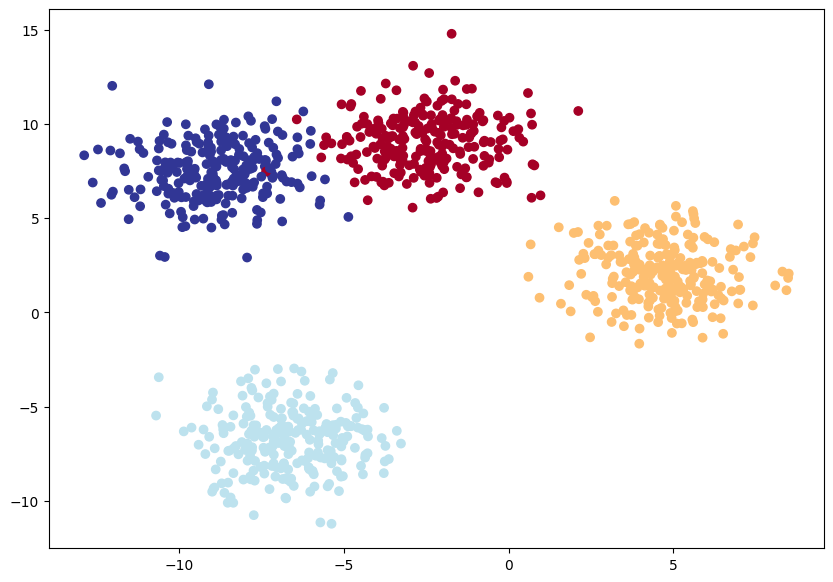

In [99]:
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)
plt.show()

### Building MultiClass Model

In [100]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [101]:
device

'cuda'

In [102]:
class BlobClassifier(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features),
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

model_3 = BlobClassifier(input_features=2,output_features = NUM_CLASSES,hidden_units = 128).to(device)
model_3

BlobClassifier(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=4, bias=True)
  )
)

 ### Creating Loss fn and Optimizer

In [103]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(),lr = 0.01)

In [104]:
loss_fn

CrossEntropyLoss()

In [105]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [106]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [107]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.softmax(model_3(X_test),dim=1)

In [108]:
y_preds = torch.argmax(y_preds,dim=1)

In [109]:
y_preds

tensor([3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3,
        3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 0,
        3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0,
        0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0,
        0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3,
        3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 3,
        0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
        3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 3,
        0, 0, 3, 3, 0, 0, 0, 0], device='cuda:0')

### Creating Training and Testing Loop

In [111]:
y_train

tensor([1, 1, 1, 1, 1, 3, 0, 0, 3, 0, 0, 2, 1, 2, 0, 3, 2, 2, 0, 2, 2, 0, 1, 3,
        0, 1, 3, 0, 3, 0, 3, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 3, 0, 0, 2, 1,
        0, 0, 2, 3, 2, 0, 0, 3, 2, 1, 0, 1, 0, 2, 0, 3, 3, 3, 0, 1, 0, 2, 1, 0,
        3, 2, 3, 0, 2, 0, 1, 1, 2, 2, 2, 0, 3, 2, 3, 0, 0, 1, 3, 1, 3, 1, 3, 2,
        3, 3, 0, 3, 2, 1, 2, 1, 3, 0, 3, 1, 3, 1, 0, 0, 0, 0, 1, 1, 1, 0, 3, 1,
        2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 1, 2, 2, 1, 2, 1, 2, 2, 3, 3, 1, 0, 2, 1,
        1, 1, 0, 2, 2, 2, 3, 3, 1, 2, 2, 1, 2, 2, 3, 1, 3, 1, 1, 3, 3, 2, 0, 2,
        1, 0, 3, 3, 1, 2, 2, 0, 1, 0, 1, 1, 0, 2, 3, 0, 1, 2, 2, 0, 3, 1, 0, 0,
        0, 2, 1, 3, 2, 1, 2, 0, 2, 2, 3, 3, 1, 2, 1, 0, 3, 2, 3, 2, 2, 0, 1, 3,
        3, 0, 1, 2, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 3, 2,
        0, 0, 0, 1, 0, 0, 3, 3, 3, 3, 1, 0, 3, 0, 3, 0, 1, 2, 2, 3, 3, 2, 2, 2,
        0, 1, 3, 2, 0, 3, 2, 0, 2, 1, 1, 0, 3, 1, 1, 0, 3, 1, 3, 0, 2, 3, 2, 0,
        1, 0, 0, 1, 3, 0, 0, 3, 0, 3, 1,

In [114]:
epochs = 1000
torch.manual_seed(42)
torch.cuda.manual_seed(42)
for epoch in range(1,epochs+1):
  model_3.train()
  y_logits = model_3(X_train)
  y_preds = torch.softmax(y_logits,dim=1).argmax(dim=1)
  train_loss = loss_fn(y_logits,y_train)
  train_acc = accuracy_fn(y_train,y_preds)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test)
    test_preds = torch.softmax(test_logits,dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_test,test_preds)
  if epoch%100 == 0:
    print(f"Epoch: {epoch}|Loss:{train_loss: .5f}|Acc: {train_acc:.2f}|Test Loss:{test_loss:.5f}| Test acc: {test_acc:.2f}")

Epoch: 100|Loss: 0.01602|Acc: 99.62|Test Loss:0.02751| Test acc: 98.50
Epoch: 200|Loss: 0.01170|Acc: 99.50|Test Loss:0.02880| Test acc: 99.00
Epoch: 300|Loss: 0.00990|Acc: 99.62|Test Loss:0.03021| Test acc: 99.00
Epoch: 400|Loss: 0.00680|Acc: 99.88|Test Loss:0.01241| Test acc: 99.50
Epoch: 500|Loss: 0.00699|Acc: 99.75|Test Loss:0.01543| Test acc: 99.00
Epoch: 600|Loss: 0.00919|Acc: 99.62|Test Loss:0.01000| Test acc: 99.50
Epoch: 700|Loss: 0.00968|Acc: 99.62|Test Loss:0.00725| Test acc: 99.50
Epoch: 800|Loss: 0.00732|Acc: 99.62|Test Loss:0.00764| Test acc: 99.50
Epoch: 900|Loss: 0.00539|Acc: 99.88|Test Loss:0.01069| Test acc: 99.50
Epoch: 1000|Loss: 0.00520|Acc: 99.88|Test Loss:0.00788| Test acc: 99.50


In [115]:
y_pred_probs = torch.softmax(model_3(X_test),dim=1).argmax(dim=1)

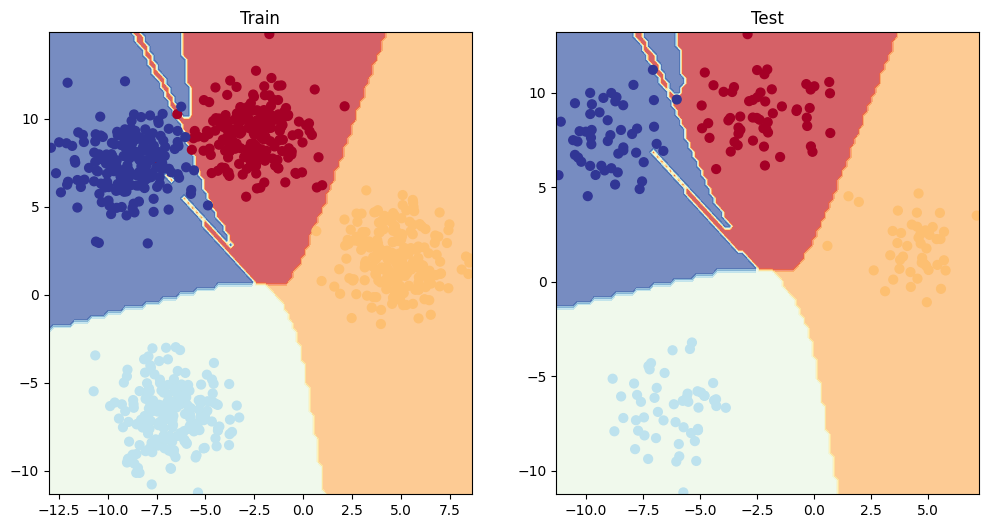

In [118]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_3,X_test,y_test)

In [117]:
y_test

tensor([2, 2, 1, 2, 3, 2, 2, 0, 1, 3, 3, 3, 2, 3, 0, 1, 1, 2, 1, 3, 1, 3, 2, 1,
        0, 1, 2, 0, 1, 3, 0, 1, 0, 0, 0, 0, 1, 3, 3, 2, 2, 3, 2, 0, 3, 2, 0, 1,
        1, 3, 1, 0, 3, 0, 1, 0, 0, 0, 0, 3, 2, 0, 1, 2, 0, 3, 2, 0, 2, 1, 3, 3,
        3, 2, 1, 0, 3, 0, 2, 3, 0, 3, 1, 1, 3, 0, 1, 3, 0, 0, 2, 1, 3, 1, 3, 3,
        3, 0, 1, 0, 0, 2, 1, 0, 1, 3, 0, 2, 1, 1, 2, 0, 3, 0, 2, 0, 0, 1, 2, 2,
        2, 3, 2, 2, 3, 0, 0, 0, 2, 0, 0, 3, 1, 2, 2, 3, 2, 0, 3, 2, 0, 3, 1, 2,
        3, 1, 2, 1, 0, 3, 2, 0, 2, 0, 2, 1, 1, 0, 3, 0, 1, 3, 0, 0, 0, 3, 3, 1,
        2, 2, 0, 2, 2, 2, 1, 3, 1, 2, 3, 1, 3, 0, 3, 2, 0, 2, 2, 3, 0, 1, 1, 2,
        3, 0, 2, 2, 3, 3, 1, 1], device='cuda:0')

### Few More Classification Metrics



1.   Accuracy - Out of 100
2.   Precision - True Value of a Class/(True Value of a Class+False Value of a Class)
3.   Recall - True Value of a Class/(True Value of a Class+False Value of Opposite Class)
4.   F1-Score
5.   Classification Report
6.   Confusion Matrix

